In [1]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import seaborn as sns
import datetime
import math
from sklearn.cluster import DBSCAN
import hdbscan
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import median_absolute_error

2024-10-11 02:15:34.375018: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-11 02:15:34.387439: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-11 02:15:34.391019: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-11 02:15:34.402148: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-10-11 02:15:35.002621: W tensorflow/compiler/tf2

In [2]:
from tensorflow.keras import mixed_precision

# # Set the global policy to mixed precision
# policy = mixed_precision.Policy('mixed_float16')
# mixed_precision.set_global_policy(policy)

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)

I0000 00:00:1728573335.860152    5933 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728573335.885678    5933 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728573335.889628    5933 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355


In [3]:
# import os

# # Set the environment variable
# os.environ['TF_GPU_ALLOCATOR'] = 'cuda_malloc_async'

In [4]:
# data = pd.read_csv("C:\Users\alanx\OneDrive - The University of Sydney (Students)\Thesis\Deep Learning\wifi_localization\data\csv\ultimate_combined.csv")
# data = pd.read_csv("data/csv/ultimate_combined.csv")
data = pd.read_csv("data/csv/still_with_receiver/still_with_receiver.csv")

data.head()

,nc,rssi,rssi1,rssi2,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,with_receiver,coord1,coord2
0,2,-0.204162,0.205596,0.445233,1,1.210600,1.840597,0.738134,-1.061457,1,7,5
1,2,-0.204162,0.205596,0.445233,2,-0.848759,-0.978989,0.955270,0.596346,1,7,5
2,2,-0.204162,0.205596,0.445233,3,1.224672,1.914379,0.726182,-1.088748,1,7,5
3,2,-0.204162,0.205596,0.445233,4,-0.789109,-0.967102,0.941196,0.586821,1,7,5
4,2,-0.204162,0.205596,0.445233,5,1.280347,1.937142,0.706598,-1.110769,1,7,5


In [5]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [6]:
from tensorflow.python.client import device_lib

def get_available_devices():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos]

print(get_available_devices())

['/device:CPU:0', '/device:GPU:0']


I0000 00:00:1728540741.306442   32536 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728540741.309006   32536 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728540741.311170   32536 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728540741.415635   32536 cuda_executor.cc:1015] successful NUMA node read from SysFS ha

In [7]:
# variances = data.var()
# print(variances)

# low_variance_cols = variances[variances < 5e-3].index.tolist()
# print("Columns with low or zero variance:")
# print(low_variance_cols)

In [5]:
# # Drop constant columns and timeframe from the DataFrame
# data.drop(low_variance_cols, axis=1, inplace=True)
# data.drop(['csi_len', 'rate', 'payload_length', 'block_length'], axis=1, inplace=True)
# data.drop('timestamps', axis=1, inplace=True)
# data.head()

,nc,rssi,rssi1,rssi2,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,coord1,coord2
0,2,-0.204162,0.205596,0.445233,1,1.210600,1.840597,0.738134,-1.061457,7,5
1,2,-0.204162,0.205596,0.445233,2,-0.848759,-0.978989,0.955270,0.596346,7,5
2,2,-0.204162,0.205596,0.445233,3,1.224672,1.914379,0.726182,-1.088748,7,5
3,2,-0.204162,0.205596,0.445233,4,-0.789109,-0.967102,0.941196,0.586821,7,5
4,2,-0.204162,0.205596,0.445233,5,1.280347,1.937142,0.706598,-1.110769,7,5


In [9]:
# # features_to_scale = ['csi_len', 'payload_length', 'block_length', 'ant1_amplitude', 'ant2_amplitude', 'ant1_phase', 'ant2_phase', 'rssi', 'rssi1', 'rssi2']
# features_to_scale = ['ant1_amplitude', 'ant2_amplitude', 'ant1_phase', 'ant2_phase', 'rssi', 'rssi1', 'rssi2']
# features_to_scale = ['ant1_amplitude', 'ant2_amplitude']
# scaler = StandardScaler()

# # Apply standardization on features
# # data = data_cleaned.copy()
# data[features_to_scale] = scaler.fit_transform(data[features_to_scale])
# data.head()

,nc,rssi,rssi1,rssi2,subcarriers,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,with_receiver,coord1,coord2
0,1,-0.847627,-0.516768,-0.887673,1,0.010022,0.618786,1.632356,0.090399,0,6,2
1,1,-0.847627,-0.516768,-0.887673,2,-0.019491,0.672789,1.613112,0.078000,0,6,2
2,1,-0.847627,-0.516768,-0.887673,3,-0.035476,0.618856,1.575681,0.075098,0,6,2
3,1,-0.847627,-0.516768,-0.887673,4,-0.085177,0.598500,1.568844,0.063920,0,6,2
4,1,-0.847627,-0.516768,-0.887673,5,-0.108754,0.759250,1.580504,0.050930,0,6,2


In [10]:
# # Step 1: Extract your data (using the amplitude data as an example)
# X = data[['ant1_amplitude', 'ant2_amplitude']].values

# # Step 2: Use Nearest Neighbors to find the k nearest neighbors
# k = 49  # min_samples - 1 for DBSCAN, for example, min_samples = 5, so k = 4
# neighbors = NearestNeighbors(n_neighbors=k)
# neighbors_fit = neighbors.fit(X)
# distances, indices = neighbors_fit.kneighbors(X)

# # Step 3: Sort the distances to the k-th nearest neighbor
# # The distance to the k-th nearest neighbor is in the last column (index k-1)
# k_distances = distances[:, k-1]
# k_distances = np.sort(k_distances)

# # Step 4: Plot the sorted k-distance graph
# plt.figure(figsize=(8, 5))
# plt.plot(k_distances)
# plt.xlabel('Points sorted by distance to {}-th nearest neighbor'.format(k))
# plt.ylabel('{}-th nearest neighbor distance'.format(k))
# plt.title('K-Distance Graph (Elbow Method for DBSCAN)')
# plt.grid(True)
# plt.show()

In [11]:
# amplitudes = data[['ant1_amplitude', 'ant2_amplitude']].values

In [12]:
# dbscan = hdbscan.HDBSCAN(min_samples=10, core_dist_n_jobs=-1)

In [13]:
# dbscan = DBSCAN(eps=0.1, min_samples=50)

In [14]:
# data_sample = data.sample(frac=0.1)
# amplitudes = data_sample[['ant1_amplitude', 'ant2_amplitude']].values

In [15]:
# dbscan.fit(amplitudes)

In [16]:
# # Step 4: Add the cluster labels to the dataframe
# data['cluster'] = dbscan.labels_

# data.head()

# # Step 5: Visualize the clusters
# plt.scatter(data['ant1_amplitude'], data['ant2_amplitude'], c=data['cluster'], cmap='viridis', alpha=0.6)
# plt.xlabel('Ant1 Amplitude')
# plt.ylabel('Ant2 Amplitude')
# plt.title('DBSCAN Clustering on Amplitude Data')
# plt.colorbar(label='Cluster Label')
# plt.show()

In [17]:
data.drop('with_receiver', axis=1, inplace=True)

In [6]:
data = pd.concat([data, pd.get_dummies(data['subcarriers'], prefix='subcarrier')], axis=1)
data.drop('subcarriers', axis=1, inplace=True)
data.head()

,nc,rssi,rssi1,rssi2,ant1_amplitude,ant2_amplitude,ant1_phase,ant2_phase,coord1,coord2,...,subcarrier_47,subcarrier_48,subcarrier_49,subcarrier_50,subcarrier_51,subcarrier_52,subcarrier_53,subcarrier_54,subcarrier_55,subcarrier_56
0,2,-0.204162,0.205596,0.445233,1.210600,1.840597,0.738134,-1.061457,7,5,...,False,False,False,False,False,False,False,False,False,False
1,2,-0.204162,0.205596,0.445233,-0.848759,-0.978989,0.955270,0.596346,7,5,...,False,False,False,False,False,False,False,False,False,False
2,2,-0.204162,0.205596,0.445233,1.224672,1.914379,0.726182,-1.088748,7,5,...,False,False,False,False,False,False,False,False,False,False
3,2,-0.204162,0.205596,0.445233,-0.789109,-0.967102,0.941196,0.586821,7,5,...,False,False,False,False,False,False,False,False,False,False
4,2,-0.204162,0.205596,0.445233,1.280347,1.937142,0.706598,-1.110769,7,5,...,False,False,False,False,False,False,False,False,False,False


# Model

In [7]:
model_type = "dnn"

In [8]:
X = data.drop(columns=['coord1', 'coord2']) 
y = data[['coord1', 'coord2']]

# X = X.values.astype(np.float32)
# y = y.values.astype(np.float32)

In [9]:
# np.save('preprocessed_X.npy', X)
# np.save('preprocessed_y.npy', y)

In [10]:
# X = np.load('preprocessed_X.npy')
# y = np.load('preprocessed_y.npy')

In [11]:
# dataset = tf.data.Dataset.from_tensor_slices((X, y))

# batch_size = 128  # Adjust based on your GPU memory

# dataset = dataset.shuffle(buffer_size=10000)
# dataset = dataset.batch(batch_size)
# dataset = dataset.prefetch(tf.data.AUTOTUNE)

In [12]:
# First, split the data into training and a temporary set (which will later be split into validation and test sets)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)  # 60% train, 40% temp

# Now, split the temporary set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)  # 20% val, 20% test

# Check the shapes of your splits
print("Training set shape:", X_train.shape)
print("Validation set shape:", X_val.shape)
print("Test set shape:", X_test.shape)

Training set shape: (2651006, 64)
Validation set shape: (883669, 64)
Test set shape: (883669, 64)


In [13]:
def create_dnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.InputLayer(input_shape=input_shape))

    # Hidden layers
    # model.add(layers.Dense(8192, activation='relu'))
    # model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(2048, activation='relu'))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))

    # Output layer
    model.add(layers.Dense(2))

    # Compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae'])
    return model


# Example of creating the model, input_shape should be (number of features,)
input_shape = (X_train.shape[1],)  # Adjust based on your number of features
model = create_dnn_model(input_shape)

# Print the model summary
model.summary()

/home/alan-xie/Documents/Thesis/wifi_localization/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
I0000 00:00:1728573406.917366    5933 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728573406.919885    5933 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
I0000 00:00:1728573406.921877    5933 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA no

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 2048)           │       133,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2048)           │     4,196,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 2)              │            34 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 11,323,922 (43.20 MB)

 Trainable params: 11,323,922 (43.20 MB)

 Non-trainable params: 0 (0.00 B)

In [14]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir="logs")
# Train the model
with tf.device('/GPU:0'):
    history = model.fit(
                        # dataset,
                        X_train, y_train, 
                        epochs=30, 
                        batch_size=128, 
                        validation_data=(X_val, y_val),
                        callbacks=[tensorboard_callback, tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])

    # Evaluate the model on test data
    test_loss, test_mae = model.evaluate(X_test, y_test)
    print(f"Test Loss: {test_loss}, Test MAE: {test_mae}")


Epoch 1/30


I0000 00:00:1728573410.324958    6674 service.cc:146] XLA service 0x77fa34006d00 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1728573410.324973    6674 service.cc:154]   StreamExecutor device (0): NVIDIA GeForce RTX 3070 Ti, Compute Capability 8.6
2024-10-11 02:16:50.361602: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-10-11 02:16:50.717944: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:531] Loaded cuDNN version 8907
2024-10-11 02:16:51.483299: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_405', 132 bytes spill stores, 132 bytes spill loads

2024-10-11 02:16:51.506475: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in fu

   33/20711 ━━━━━━━━━━━━━━━━━━━━ 1:06 3ms/step - loss: 5.9473 - mae: 1.9283    

I0000 00:00:1728573420.595202    6674 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


20693/20711 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8836 - mae: 1.0241

2024-10-11 02:17:59.971731: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_433', 20 bytes spill stores, 20 bytes spill loads

2024-10-11 02:17:59.982661: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_405', 20 bytes spill stores, 20 bytes spill loads

2024-10-11 02:18:00.308921: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_447', 80 bytes spill stores, 80 bytes spill loads

2024-10-11 02:18:00.318646: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_461', 16 bytes spill stores, 16 bytes spill loads

2024-10-11 02:18:00.400659: I external/local_xla/xla/stream_exec

20711/20711 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.8829 - mae: 1.0238

2024-10-11 02:18:16.864359: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 88 bytes spill stores, 88 bytes spill loads

2024-10-11 02:18:16.884374: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 20 bytes spill stores, 20 bytes spill loads

2024-10-11 02:18:17.020080: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 204 bytes spill stores, 204 bytes spill loads

2024-10-11 02:18:17.315999: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 360 bytes spill stores, 268 bytes spill loads

2024-10-11 02:18:17.319234: I external/local_xla/xla/stream_exec

20711/20711 ━━━━━━━━━━━━━━━━━━━━ 92s 4ms/step - loss: 1.8829 - mae: 1.0238 - val_loss: 0.3266 - val_mae: 0.2824
Epoch 2/30
20711/20711 ━━━━━━━━━━━━━━━━━━━━ 64s 3ms/step - loss: 0.3169 - mae: 0.2674 - val_loss: 0.2379 - val_mae: 0.2101
Epoch 3/30
20711/20711 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - loss: 0.2020 - mae: 0.1807 - val_loss: 0.1581 - val_mae: 0.1420
Epoch 4/30
20711/20711 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - loss: 0.1525 - mae: 0.1433 - val_loss: 0.1342 - val_mae: 0.1194
Epoch 5/30
20711/20711 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - loss: 0.1277 - mae: 0.1240 - val_loss: 0.1063 - val_mae: 0.1104
Epoch 6/30
20711/20711 ━━━━━━━━━━━━━━━━━━━━ 65s 3ms/step - loss: 0.1107 - mae: 0.1117 - val_loss: 0.1036 - val_mae: 0.0997
Epoch 7/30
20711/20711 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - loss: 0.0983 - mae: 0.1016 - val_loss: 0.0860 - val_mae: 0.1002
Epoch 8/30
20711/20711 ━━━━━━━━━━━━━━━━━━━━ 63s 3ms/step - loss: 0.0934 - mae: 0.0990 - val_loss: 0.0966 - val_mae: 0.0943
Epoch 9/30
20711/20711 ━━━━

2024-10-11 02:35:13.962923: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 132 bytes spill stores, 132 bytes spill loads

2024-10-11 02:35:13.963609: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_56', 16 bytes spill stores, 16 bytes spill loads

2024-10-11 02:35:14.561737: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_56', 132 bytes spill stores, 132 bytes spill loads

2024-10-11 02:35:14.659524: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_63', 132 bytes spill stores, 132 bytes spill loads

2024-10-11 02:35:15.050608: I external/local_xla/xla/stream_ex

27548/27615 ━━━━━━━━━━━━━━━━━━━━ 0s 707us/step - loss: 0.2085 - mae: 0.1824

2024-10-11 02:35:36.888145: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 80 bytes spill stores, 80 bytes spill loads

2024-10-11 02:35:37.085067: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 40 bytes spill stores, 60 bytes spill loads

2024-10-11 02:35:37.130031: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_42', 204 bytes spill stores, 204 bytes spill loads

2024-10-11 02:35:37.292749: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_63', 12 bytes spill stores, 12 bytes spill loads

2024-10-11 02:35:37.349593: I external/local_xla/xla/stream_execut

27615/27615 ━━━━━━━━━━━━━━━━━━━━ 26s 833us/step - loss: 0.2085 - mae: 0.1824
Test Loss: 0.20979170501232147, Test MAE: 0.18283787369728088


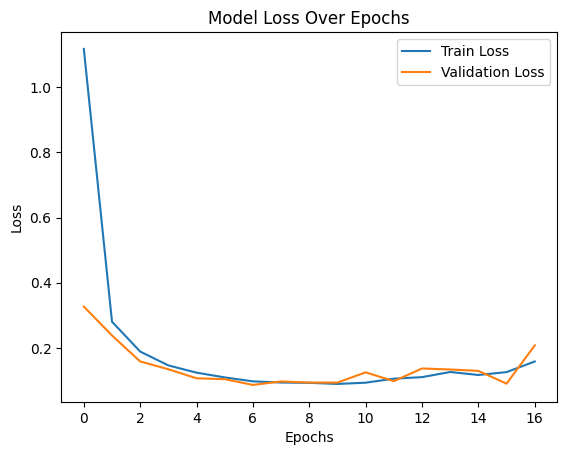

In [15]:
# Plot training & validation loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


In [16]:
# After training your model
y_pred = model.predict(X_test)

27615/27615 ━━━━━━━━━━━━━━━━━━━━ 19s 661us/step


In [17]:
# Convert y_test to NumPy array with float64 data type
y_test_np = y_test.to_numpy(dtype=np.float64)

# Ensure y_pred is a NumPy array with float64 data type
y_pred_np = np.array(y_pred, dtype=np.float64)

In [18]:
# Assuming y_test and y_pred are NumPy arrays
absolute_errors = np.abs(y_test_np - y_pred_np)
coordinate_ranges = np.ptp(y_test_np, axis=0)  # Peak to peak (max - min) along each coordinate

# Avoid division by zero
coordinate_ranges[coordinate_ranges == 0] = 1

relative_errors = absolute_errors / coordinate_ranges
mean_relative_error = np.mean(relative_errors, axis=0)

print(f"Mean Relative Error for coord1: {mean_relative_error[0]:.4f}")
print(f"Mean Relative Error for coord2: {mean_relative_error[1]:.4f}")


Mean Relative Error for coord1: 0.0335
Mean Relative Error for coord2: 0.0329


In [19]:
from scipy.stats import spearmanr

rho_coord1, _ = spearmanr(y_test_np[:, 0], y_pred_np[:, 0])
rho_coord2, _ = spearmanr(y_test_np[:, 1], y_pred_np[:, 1])

print(f"Spearman's Rank Correlation for coord1: {rho_coord1:.4f}")
print(f"Spearman's Rank Correlation for coord2: {rho_coord2:.4f}")


Spearman's Rank Correlation for coord1: 0.9503
Spearman's Rank Correlation for coord2: 0.9436


In [20]:
# Create a mapping from coordinate pairs to class labels
unique_coords = np.unique(y_test_np, axis=0)
coord_to_label = {tuple(coord): idx for idx, coord in enumerate(unique_coords)}

# Convert coordinates to labels
y_test_labels = np.array([coord_to_label[tuple(coord)] for coord in y_test_np])
y_pred_labels = np.array([coord_to_label.get(tuple(coord), -1) for coord in y_pred_np])  # Use -1 for unknowns


In [21]:
# from sklearn.metrics import accuracy_score, confusion_matrix

# # Filter out predictions that don't map to a valid label
# valid_indices = y_pred_labels != -1
# accuracy = accuracy_score(y_test_labels[valid_indices], y_pred_labels[valid_indices])
# print(f"Classification Accuracy: {accuracy:.4f}")


In [22]:
# import matplotlib.pyplot as plt
# from sklearn.metrics import ConfusionMatrixDisplay

# cm = confusion_matrix(y_test_labels[valid_indices], y_pred_labels[valid_indices])
# disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot(cmap='Blues')
# plt.title('Confusion Matrix of Predicted vs Actual Classes')
# plt.show()

In [23]:
scaler = StandardScaler()
y_test_scaled = scaler.fit_transform(y_test_np)
y_pred_scaled = scaler.transform(y_pred_np)

# Compute Mean Squared Error on standardized data
from sklearn.metrics import mean_squared_error

mse_scaled = mean_squared_error(y_test_scaled, y_pred_scaled)
print(f"MSE on Standardized Coordinates: {mse_scaled:.4f}")


MSE on Standardized Coordinates: 0.0778


In [24]:
def custom_accuracy(y_true, y_pred, tolerance):
    # Count predictions within a certain tolerance
    correct_predictions = np.all(np.abs(y_true - y_pred) <= tolerance, axis=1)
    accuracy = np.mean(correct_predictions)
    return accuracy

tolerances = [1, 0.5, 0.1]  # Adjust based on your coordinate system

for tolerance in tolerances:
    accuracy = custom_accuracy(y_test_np, y_pred_np, tolerance)
    print(f"Accuracy within tolerance {tolerance}: {accuracy:.4f}")

accuracy = custom_accuracy(y_test_np, y_pred_np, 1)

Accuracy within tolerance 1: 0.9384
Accuracy within tolerance 0.5: 0.8984
Accuracy within tolerance 0.1: 0.3780


In [25]:
tolerances = [1, 0.5, 0.1]  # Adjust based on your coordinate system

y_pred_np_rounded = np.round(y_pred_np)

for tolerance in tolerances:
    accuracy = custom_accuracy(y_test_np, y_pred_np_rounded, tolerance)
    print(f"Accuracy within tolerance {tolerance}: {accuracy:.4f}")

accuracy = custom_accuracy(y_test_np, y_pred_np, 1)

Accuracy within tolerance 1: 0.9616
Accuracy within tolerance 0.5: 0.8984
Accuracy within tolerance 0.1: 0.8984


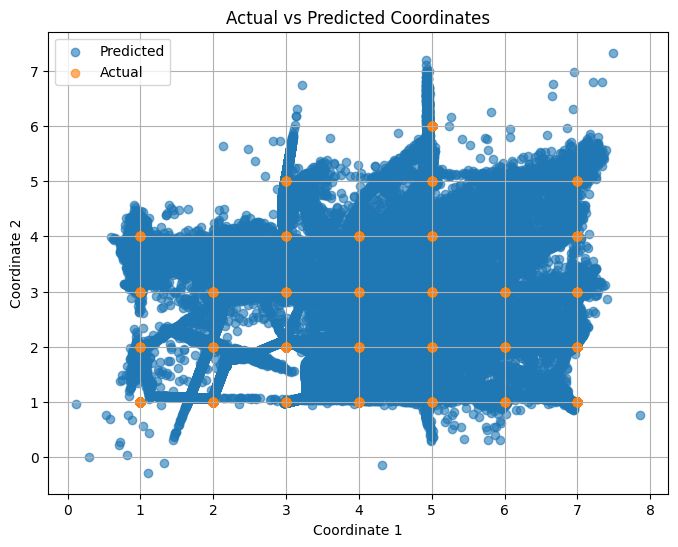

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_pred_np[:, 0], y_pred_np[:, 1], label='Predicted', alpha=0.6)
plt.scatter(y_test_np[:, 0], y_test_np[:, 1], label='Actual', alpha=0.6)
plt.xlabel('Coordinate 1')
plt.ylabel('Coordinate 2')
plt.title('Actual vs Predicted Coordinates')
plt.legend()
plt.grid(True)
plt.show()


In [27]:
# MAE for each coordinate
mae_coord1 = mean_absolute_error(y_test_np[:, 0], y_pred_np[:, 0])
mae_coord2 = mean_absolute_error(y_test_np[:, 1], y_pred_np[:, 1])

# Overall MAE
mae_overall = np.mean([mae_coord1, mae_coord2])

print(f"MAE for coord1: {mae_coord1:.4f}")
print(f"MAE for coord2: {mae_coord2:.4f}")
print(f"Overall MAE: {mae_overall:.4f}")

# RMSE for each coordinate
rmse_coord1 = np.sqrt(mean_squared_error(y_test_np[:, 0], y_pred_np[:, 0]))
rmse_coord2 = np.sqrt(mean_squared_error(y_test_np[:, 1], y_pred_np[:, 1]))

# Overall RMSE
rmse_overall = np.mean([rmse_coord1, rmse_coord2])

print(f"RMSE for coord1: {rmse_coord1:.4f}")
print(f"RMSE for coord2: {rmse_coord2:.4f}")
print(f"Overall RMSE: {rmse_overall:.4f}")

# Calculate Euclidean distances
distance_errors = np.linalg.norm(y_test_np - y_pred_np, axis=1)
mean_distance_error = np.mean(distance_errors)

print(f"Mean Euclidean Distance Error: {mean_distance_error:.4f} units")

# R-squared for each coordinate
r2_coord1 = r2_score(y_test_np[:, 0], y_pred_np[:, 0])
r2_coord2 = r2_score(y_test_np[:, 1], y_pred_np[:, 1])

print(f"R-squared for coord1: {r2_coord1:.4f}")
print(f"R-squared for coord2: {r2_coord2:.4f}")

# Median Absolute Error for each coordinate
medae_coord1 = median_absolute_error(y_test_np[:, 0], y_pred_np[:, 0])
medae_coord2 = median_absolute_error(y_test_np[:, 1], y_pred_np[:, 1])

print(f"Median Absolute Error for coord1: {medae_coord1:.4f}")
print(f"Median Absolute Error for coord2: {medae_coord2:.4f}")

for tolerance in tolerances:
    accuracy = custom_accuracy(y_test_np, y_pred_np, tolerance)
    print(f"Accuracy within tolerance {tolerance}: {accuracy:.4f}")

MAE for coord1: 0.2010
MAE for coord2: 0.1647
Overall MAE: 0.1828
RMSE for coord1: 0.5168
RMSE for coord2: 0.3905
Overall RMSE: 0.4537
Mean Euclidean Distance Error: 0.2916 units
R-squared for coord1: 0.9231
R-squared for coord2: 0.9213
Median Absolute Error for coord1: 0.0781
Median Absolute Error for coord2: 0.0762
Accuracy within tolerance 1: 0.9384
Accuracy within tolerance 0.5: 0.8984
Accuracy within tolerance 0.1: 0.3780


In [28]:
# from sklearn.model_selection import cross_val_score
# from sklearn.metrics import make_scorer

# def mean_euclidean_error(y_true, y_pred):
#     return np.mean(np.linalg.norm(y_true - y_pred, axis=1))

# # Create a scorer based on your custom metric
# scorer = make_scorer(mean_euclidean_error, greater_is_better=False)

# # Assuming you have a model compatible with scikit-learn's API
# scores = cross_val_score(model, X, y, cv=5, scoring=scorer)
# print(f"Cross-validated Mean Euclidean Distance Error: {-np.mean(scores):.4f}")


In [29]:
now = datetime.datetime.now()
date_time = now.strftime("%m-%d-%H-%M")
accuracy = custom_accuracy(y_test_np, y_pred_np, 1)
model.save(f"./models/{date_time}-{model_type}-{accuracy:.2f}.keras")

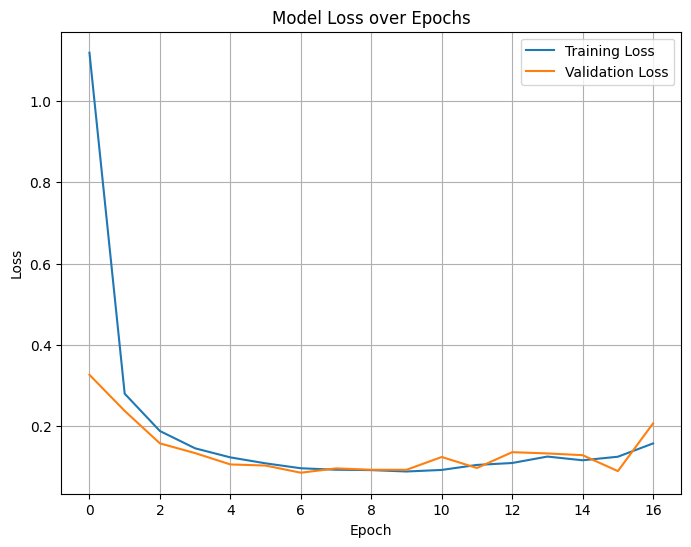

In [30]:
plt.figure(figsize=(8, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


In [31]:
from sklearn.model_selection import KFold
import numpy as np

kf = KFold(n_splits=5, shuffle=True, random_state=42)
mae_scores = []

for train_index, test_index in kf.split(X):
    X_train_cv, X_test_cv = X.iloc[train_index], X.iloc[test_index]
    y_train_cv, y_test_cv = y.iloc[train_index], y.iloc[test_index]
    
    # Create and train the model
    model = create_dnn_model(input_shape=(X_train_cv.shape[1],))
    model.fit(X_train_cv, y_train_cv, epochs=30, batch_size=128, verbose=0)
    
    # Evaluate the model
    y_pred_cv = model.predict(X_test_cv)
    mae_cv = np.mean(np.abs(y_test_cv - y_pred_cv))
    mae_scores.append(mae_cv)

print(f"Cross-validated MAE: {np.mean(mae_scores):.4f} ± {np.std(mae_scores):.4f}")

/home/alan-xie/Documents/Thesis/wifi_localization/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
2024-10-11 02:37:27.241530: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_405', 20 bytes spill stores, 20 bytes spill loads

2024-10-11 02:37:27.370556: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_447', 200 bytes spill stores, 200 bytes spill loads

2024-10-11 02:37:27.408627: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:393] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_405', 204 bytes spill stores, 204 bytes spill loads

2024-10-11 02:37:27.731658: I external/local_xla/xla/stream_executor/cuda/cuda_

27615/27615 ━━━━━━━━━━━━━━━━━━━━ 19s 652us/step


/home/alan-xie/Documents/Thesis/wifi_localization/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


27615/27615 ━━━━━━━━━━━━━━━━━━━━ 18s 650us/step


/home/alan-xie/Documents/Thesis/wifi_localization/.venv/lib/python3.10/site-packages/keras/src/layers/core/input_layer.py:26: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(
